### Open tracking data file and parse raw protobuf data

In [2]:
# pandas, matplotlib, numpy, protobuf
import trackingDataPb_pb2

# open protobuf file
with open("data/test/guemah_backhand_01out.pb", "rb") as f:
    # create tracking data object
    tracking_data = trackingDataPb_pb2.trackingData()
    
    # parse string from file
    tracking_data.ParseFromString(f.read())

type(tracking_data)

trackingDataPb_pb2.trackingData

### Check video metadata

In [3]:
tracking_data.videoMeta

frameRate: 30
resX: 1080
resY: 1920

### Check number of frames in video

In [4]:
len(tracking_data.frameData)

65

### How long is the video?

In [5]:
print(f"Video is {len(tracking_data.frameData) / tracking_data.videoMeta.frameRate:.2f} seconds long")

Video is 2.17 seconds long


### Which frame contains the first tracking data?

In [6]:

for i, frame in enumerate(tracking_data.frameData):
    if frame.poseData:
        print(i)
        break

0


### Draw a skeleton in frame 50

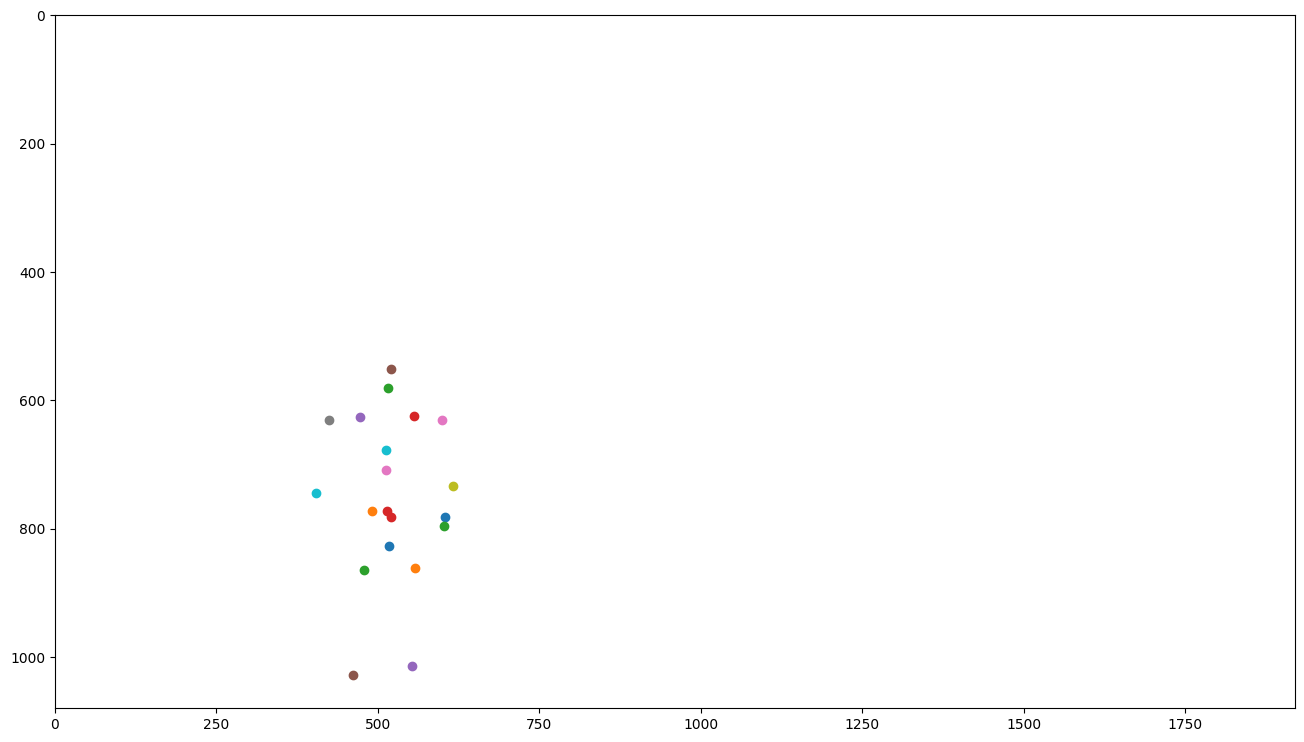

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

ax.set_xlim([0, 1920])
ax.set_ylim([1080, 0])

for kp in tracking_data.frameData[0].poseData[0].keyPoints:
    ax.scatter(kp.posX, kp.posY)


### Parse tracking data as pandas dataframe

In [8]:
import pandas as pd

# initialize empty array
df = []

# for each frame in our tracking data
for frame in tracking_data.frameData:
    # for each pose in each frame
    for pose in frame.poseData:
        # for each keypoint in each pose
        for keypoint in pose.keyPoints:
            # add frame and keypoint information to array
            df.append([frame.index, pose.id, keypoint.type, keypoint.posX, keypoint.posY, keypoint.absPosX, keypoint.absPosY, keypoint.absPosZ])

df = pd.DataFrame(df, columns=["frame", "pose", "keypoint", "x", "y", "absX", "absY", "absZ"])
df

,frame,pose,keypoint,x,y,absX,absY,absZ
0,0,0,0,518.049561,826.849609,-49.461815,-300.032898,4639.007812
1,0,0,1,557.222656,861.438965,39.109734,-223.815308,4675.017090
2,0,0,2,479.434418,864.210083,-136.300079,-215.570877,4633.069336
3,0,0,3,513.984009,772.838379,-58.760353,-422.728271,4649.894531
4,0,0,4,553.058716,1013.418945,30.830851,126.119118,4860.540039
...,...,...,...,...,...,...,...,...
1555,64,0,19,358.245056,632.804077,-327.667786,-589.868774,3711.472168
1556,64,0,20,687.603088,902.237549,303.243317,-118.670120,4229.552734
1557,64,0,21,354.087616,551.505310,-316.179688,-694.723633,3501.259766
1558,64,0,22,703.345886,939.487061,336.353577,-42.239178,4239.225586


### Change data format to one row per frame and pose

In [11]:
dfp = df.pivot(index=["frame", "pose"], columns="keypoint", values=["x", "y", "absX", "absY", "absZ"])
dfp = dfp.swaplevel(axis=1)
dfp

,keypoint,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
,,x,x,x,x,x,x,x,x,x,x,...,absZ,absZ,absZ,absZ,absZ,absZ,absZ,absZ,absZ,absZ
frame,pose,,,,,,,,,,,,,,,,,,,,,
0,0,518.049561,557.222656,479.434418,513.984009,553.058716,462.353027,513.203186,535.384583,453.455322,513.037598,...,4524.955078,4440.090332,4571.986816,4488.444336,4612.925781,4497.043457,4413.258789,4378.132324,4328.434570,4312.817871
1,0,519.469421,558.407898,481.610352,514.108398,554.681458,465.661194,513.925842,537.959045,455.963043,513.991638,...,4488.138672,4404.967773,4553.054688,4449.317383,4616.068848,4463.136719,4403.681641,4346.784180,4314.696777,4283.019531
2,0,520.321533,559.151367,482.892914,514.822327,555.192505,468.143463,514.973389,539.494873,458.928253,514.994751,...,4488.980469,4406.721680,4553.780273,4447.920898,4604.106445,4453.420898,4386.512695,4337.122070,4294.979492,4273.916016
3,0,522.195374,561.208252,485.181641,517.190918,557.180115,470.669403,516.797852,541.427063,460.811371,516.963562,...,4483.125000,4402.159668,4547.674316,4441.896484,4601.920898,4445.950195,4376.090820,4332.428711,4283.131348,4266.692871
4,0,522.374695,561.564514,486.010406,516.442627,558.448364,473.202454,516.370361,542.537842,463.356873,516.791016,...,4472.291504,4393.817383,4549.798340,4427.039062,4607.424805,4431.002930,4372.058594,4322.024902,4274.872070,4255.368164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,536.598572,581.985474,499.581604,522.223572,647.367798,513.372437,529.734863,621.746948,533.549194,535.414185,...,3955.706299,3880.546875,4100.588379,3910.927246,4273.952148,3818.333252,4278.001953,3643.132080,4284.374023,3581.424561
61,0,535.941223,581.863403,498.816162,521.051331,650.585327,513.911621,528.941528,621.775269,535.541016,534.924927,...,3955.219482,3882.792236,4101.202148,3903.916504,4273.911133,3786.735596,4278.977539,3583.175049,4281.872070,3514.956299


### Show progression of first keypoint through the video

<Axes: xlabel='frame,pose'>

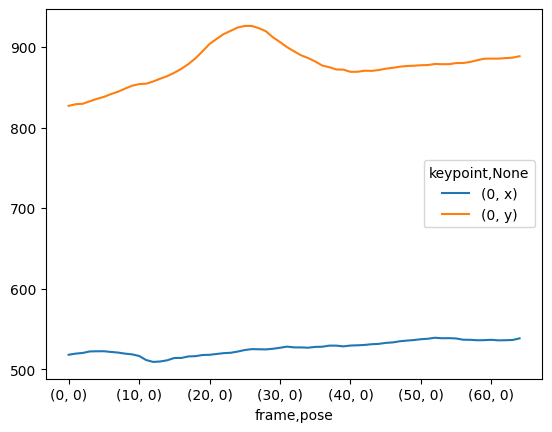

In [12]:
kp0 = dfp.loc[:,pd.IndexSlice[[0],["x", "y"]]]
kp0.plot()

### Calculate pixel speed of keypoint 0 through the video

In [13]:
# get data and shift by one
kp0_shifted = pd.concat([kp0, kp0.shift(1)], axis=1)

def euclidean_distance(x):
    return ((x.iloc[0] - x.iloc[2]) ** 2 + (x.iloc[1] - x.iloc[3]) ** 2) ** 0.5

velocity = kp0_shifted.apply(lambda x: euclidean_distance(x), axis=1).mean() * tracking_data.videoMeta.frameRate

print(f"Velocity in video is {velocity:.0f} pixels per second")

Velocity in video is 93 pixels per second
